In [6]:
 !pip install opendatasets
 import opendatasets as od
 od.download("https://www.kaggle.com/datasets/msambare/fer2013")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: farahfawzydoso
Your Kaggle Key: ········


KeyError: 'content-length'

In [ ]:

import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPool2D,BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [ ]:
trainpath = r'/content/fer2013/train'
testpath = r'/content/fer2013/test'

for folder in os.listdir(trainpath):
  files =gb.glob(pathname=str(trainpath + '/' + folder +'/*.jpg'))
  print(f'for training data ,found{len(files)} in folder {folder}')

for training data ,found3995 in folder angry
for training data ,found436 in folder disgust
for training data ,found4965 in folder neutral
for training data ,found7215 in folder happy
for training data ,found3171 in folder surprise
for training data ,found4097 in folder fear
for training data ,found4830 in folder sad


In [ ]:
for folder in os.listdir(testpath):
  files =gb.glob(pathname=str(testpath + '/' + folder +'/*.jpg'))
  print(f'for testing data ,found{len(files)} in folder {folder}')

for testing data ,found958 in folder angry
for testing data ,found111 in folder disgust
for testing data ,found1233 in folder neutral
for testing data ,found1774 in folder happy
for testing data ,found831 in folder surprise
for testing data ,found1024 in folder fear
for testing data ,found1247 in folder sad


In [ ]:
code = {'angry':0 , 'disgust':1 , 'fear':2 , 'happy':3 , 'neutral':4 , 'sad':5 , 'surprise':6}
def getcode(n) :
  for x ,y in code.items():
    if n==y :
        return x

In [ ]:
#now how about image size in train folder
size=[]
for folder in os.listdir(trainpath):
  files=gb.glob(pathname=str(trainpath+'/'+folder+'/*.jpg'))
  for file in files:
    image=plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(48, 48)    28709
dtype: int64

In [ ]:
#now how about image size in test folder
size=[]
for folder in os.listdir(testpath):
  files=gb.glob(pathname=str(testpath+'/'+folder+'/*.jpg'))
  for file in files:
    image=plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(48, 48)    7178
dtype: int64

In [ ]:
x_train=[]
y_train=[]
for folder in os.listdir(trainpath):
  files=gb.glob(pathname=str(trainpath+'/'+folder+'/*.jpg'))
  for file in files:
    image = cv2.imread(file, cv2.IMREAD_COLOR)
    x_train.append(image)
    y_train.append(code[folder])

print(f'we have {len(x_train)} items in x_train')

we have 28709 items in x_train


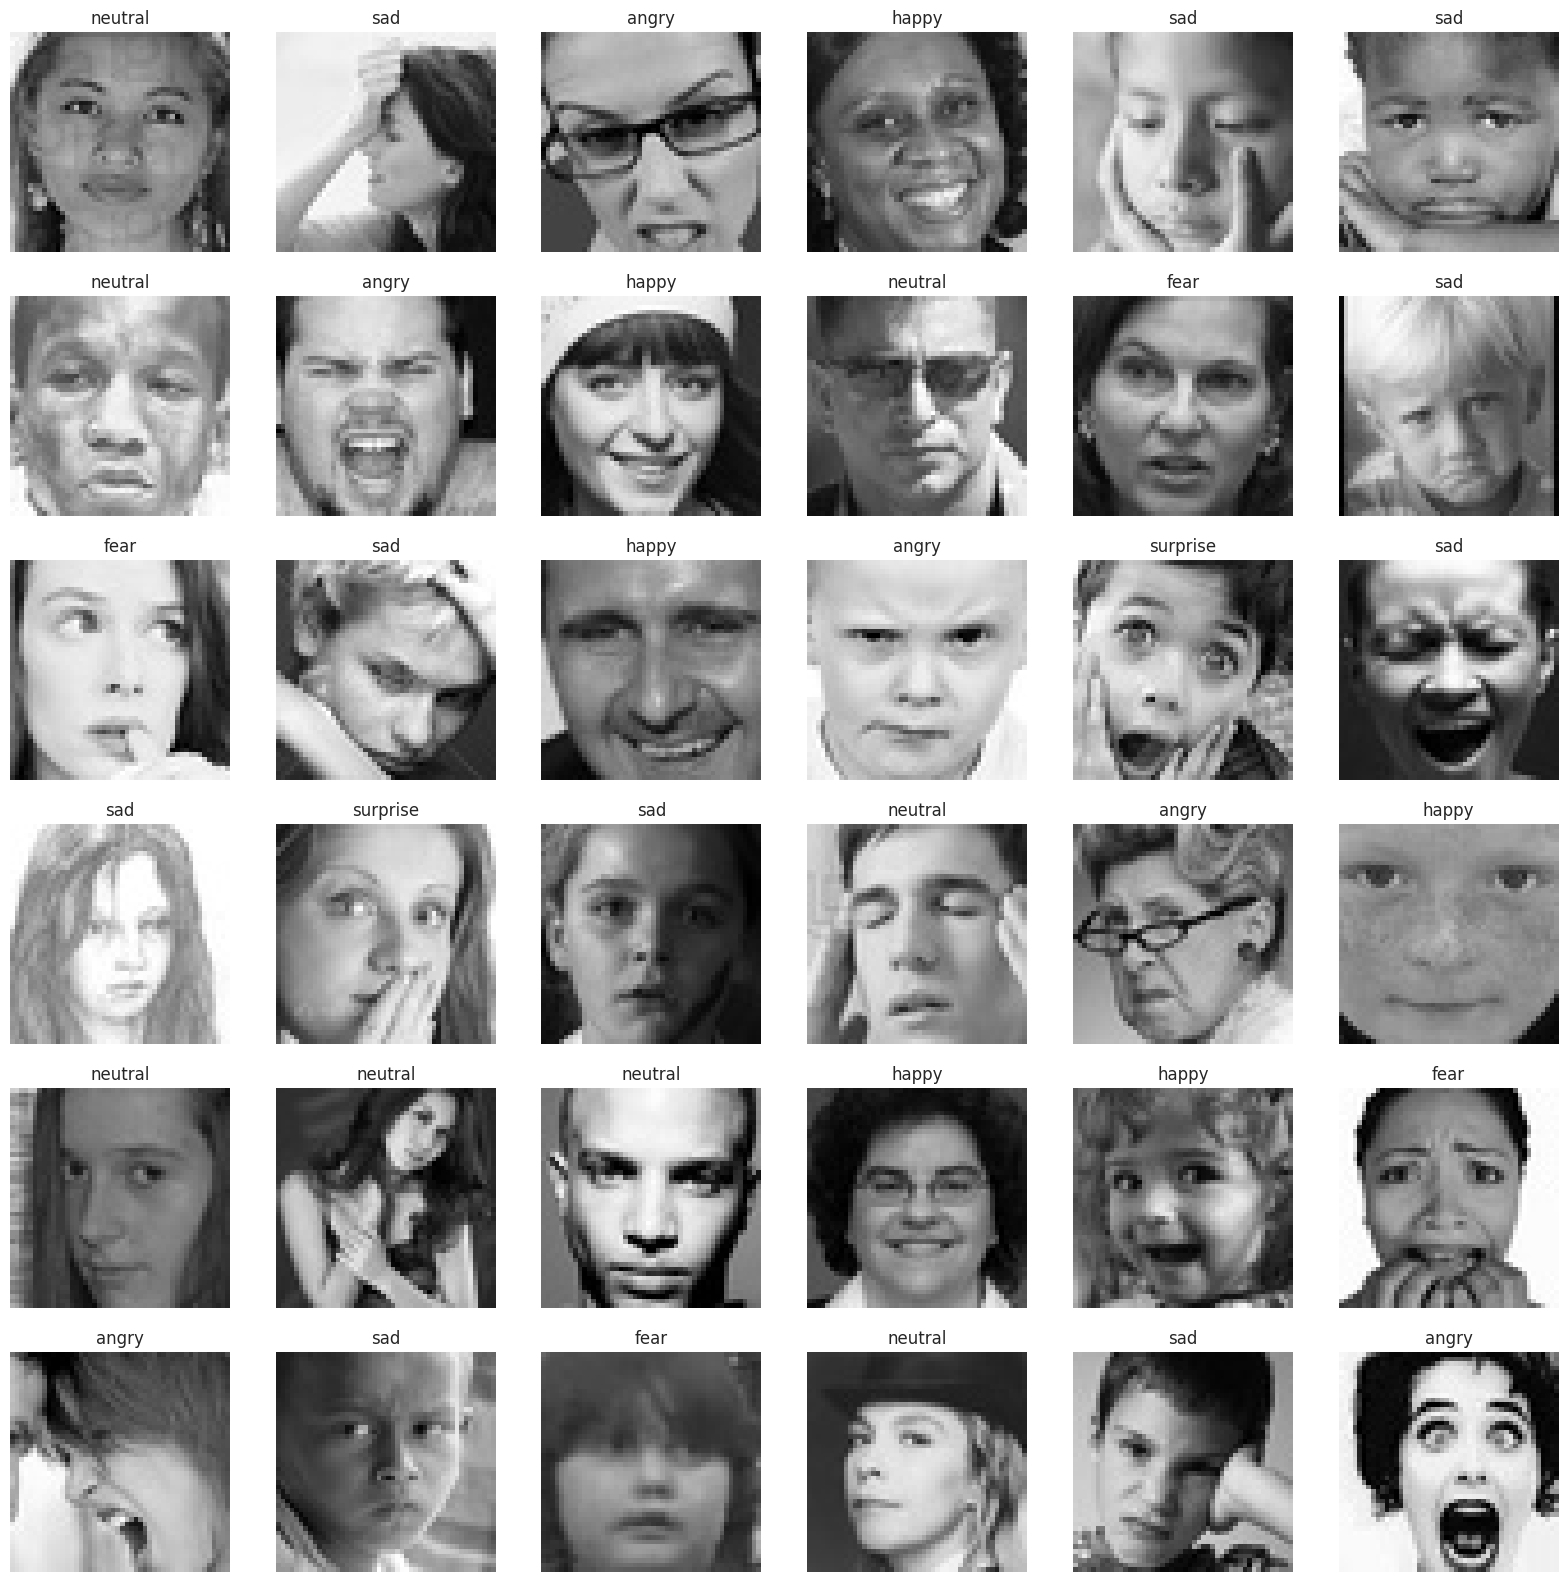

In [ ]:
plt.figure(figsize=(20 , 20))
for n , i in enumerate(list(np.random.randint(0 , len(x_train),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(getcode(y_train[i]))

In [ ]:
x_test=[]
y_test=[]
for folder in os.listdir(testpath):
  files=gb.glob(pathname=str(testpath+'/'+folder+'/*.jpg'))
  for file in files:
    image = cv2.imread(file, cv2.IMREAD_COLOR)
    x_test.append(image)
    y_test.append(code[folder])

print(f'we have {len(x_test)} items in x_test')

we have 7178 items in x_test


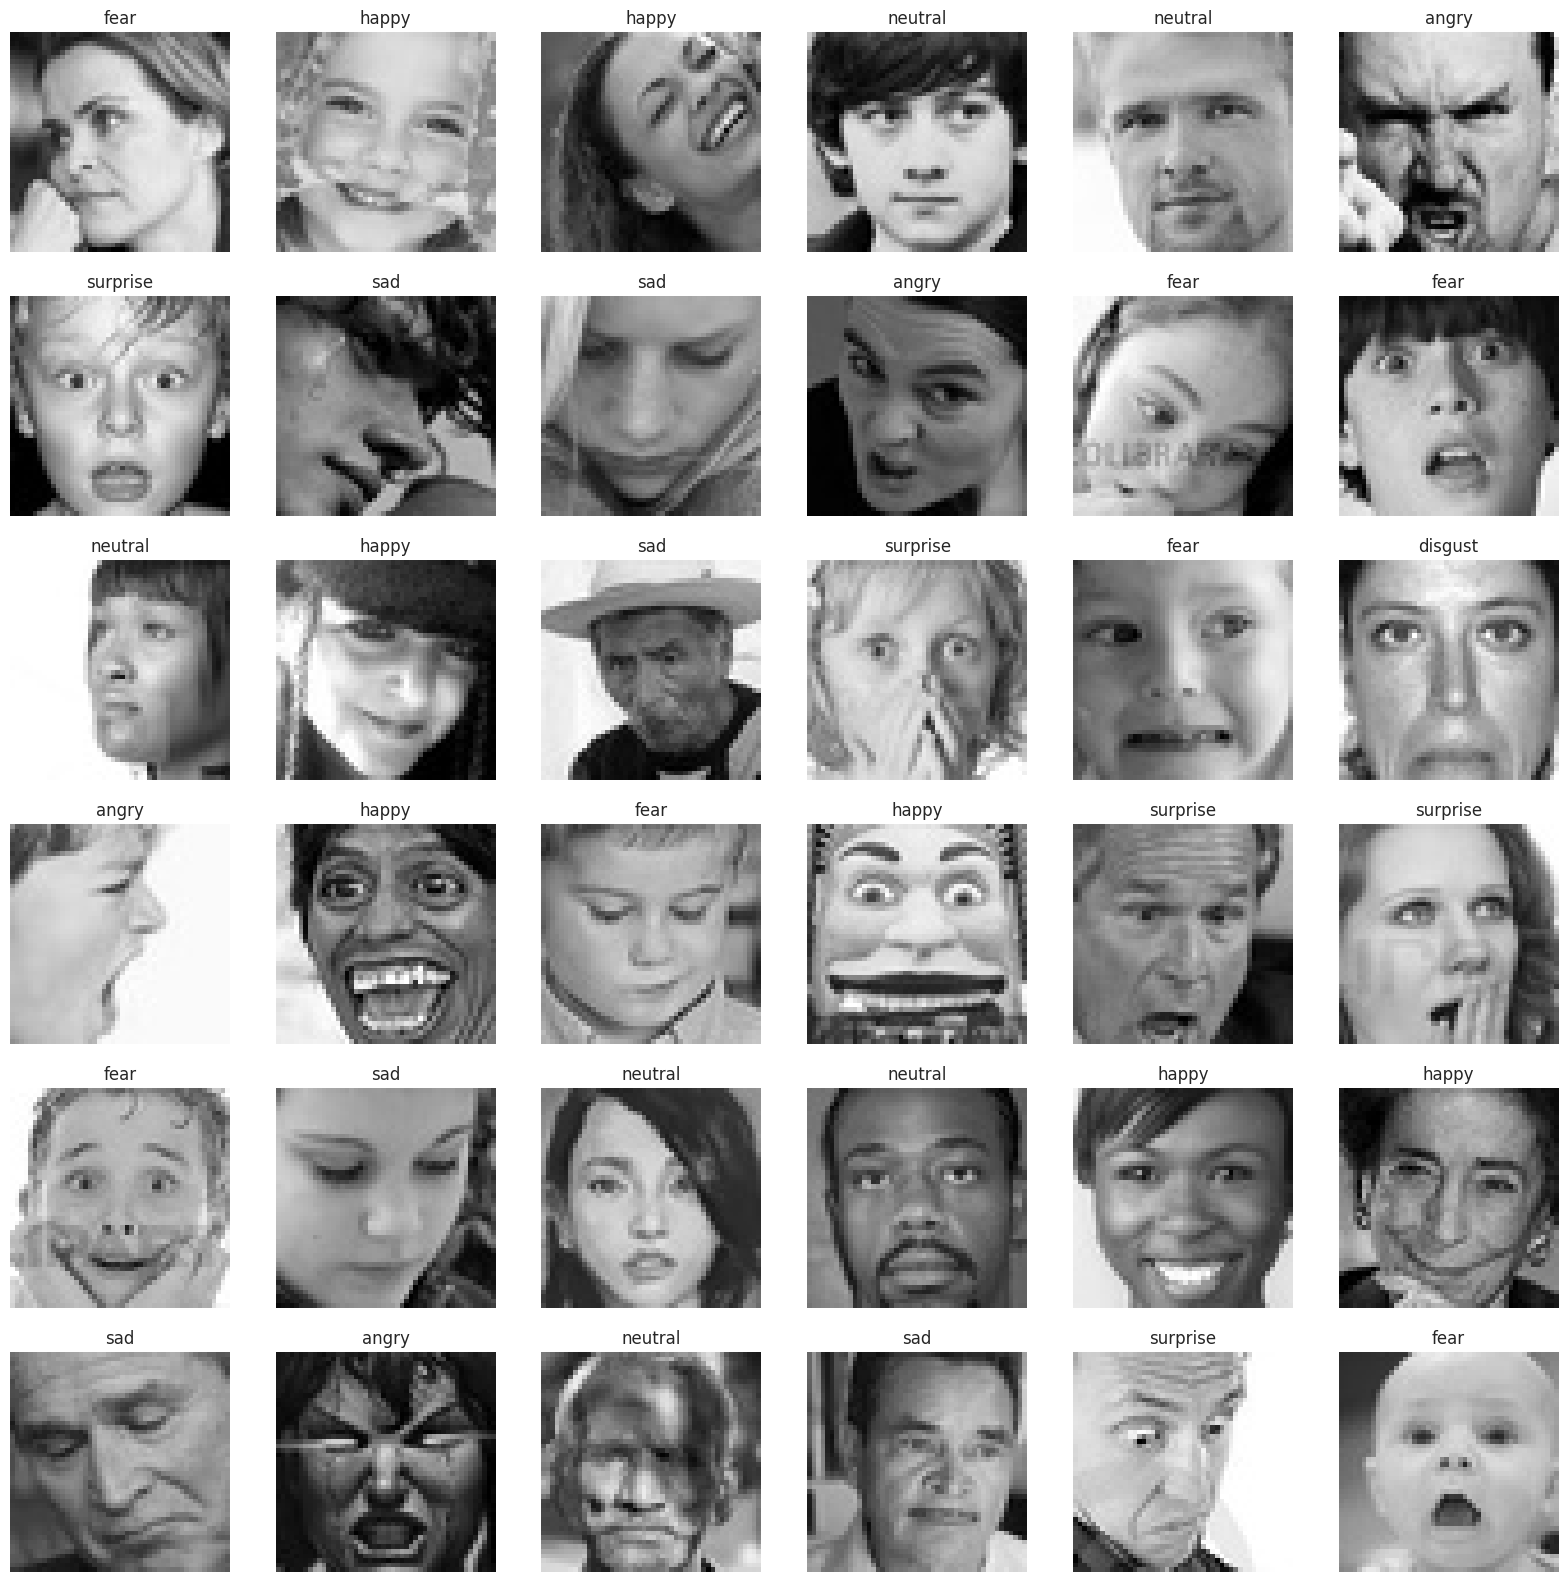

In [ ]:
plt.figure(figsize=(20 , 20))
for n , i in enumerate(list(np.random.randint(0 , len(x_test),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x_test[i])
  plt.axis('off')
  plt.title(getcode(y_test[i]))

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28709, 48, 48)
(28709,)
(7178, 48, 48)
(7178,)


In [ ]:
CNN= Sequential()
CNN.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(48,48,1)))
CNN.add(Conv2D(64,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(128,(3,3),padding='same',activation='relu'))
CNN.add(Conv2D(256,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Conv2D(256,(3,3),padding='same',activation='relu'))
CNN.add(BatchNormalization())
CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Dropout(0.25))

CNN.add(Flatten()) 

CNN.add(Dense(100,activation = 'relu'))

CNN.add(Dense(50,activation = 'relu'))

CNN.add(Dense(225,activation = 'relu'))

CNN.add(BatchNormalization())
CNN.add(Dropout(0.25))

CNN.add(Dense(7, activation='softmax'))

In [ ]:
CNN.compile( optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

print ('Model Details Are :')
print (CNN.summary())

Model Details Are :
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None

In [ ]:
epochs = 20
ThisModel = CNN.fit(x_train , y_train , epochs=epochs ,batch_size=64 ,verbose=1 )

Epoch 1/20
449/449 [==============================] - 24s 39ms/step - loss: 1.7279 - accuracy: 0.3379
Epoch 2/20
449/449 [==============================] - 18s 40ms/step - loss: 1.3786 - accuracy: 0.4725
Epoch 3/20
449/449 [==============================] - 17s 39ms/step - loss: 1.2026 - accuracy: 0.5441
Epoch 4/20
449/449 [==============================] - 17s 38ms/step - loss: 1.1110 - accuracy: 0.5812
Epoch 5/20
449/449 [==============================] - 17s 38ms/step - loss: 1.0255 - accuracy: 0.6169
Epoch 6/20
449/449 [==============================] - 17s 38ms/step - loss: 0.9698 - accuracy: 0.6381
Epoch 7/20
449/449 [==============================] - 17s 38ms/step - loss: 0.8968 - accuracy: 0.6679
Epoch 8/20
449/449 [==============================] - 17s 38ms/step - loss: 0.8146 - accuracy: 0.6999
Epoch 9/20
449/449 [==============================] - 17s 39ms/step - loss: 0.7469 - accuracy: 0.7256
Epoch 10/20
449/449 [==============================] - 17s 38ms/step - loss: 0.659

In [ ]:
epochs = 50
ThisModel = CNN.fit(x_train , y_train , epochs=epochs ,batch_size=64 ,verbose=1 )

Epoch 1/50
449/449 [==============================] - 20s 45ms/step - loss: 0.0503 - accuracy: 0.9839
Epoch 2/50
449/449 [==============================] - 21s 48ms/step - loss: 0.0506 - accuracy: 0.9827
Epoch 3/50
449/449 [==============================] - 18s 41ms/step - loss: 0.0565 - accuracy: 0.9809
Epoch 4/50
449/449 [==============================] - 19s 41ms/step - loss: 0.0469 - accuracy: 0.9836
Epoch 5/50
449/449 [==============================] - 18s 39ms/step - loss: 0.0455 - accuracy: 0.9848
Epoch 6/50
449/449 [==============================] - 17s 38ms/step - loss: 0.0428 - accuracy: 0.9860
Epoch 7/50
449/449 [==============================] - 17s 38ms/step - loss: 0.0472 - accuracy: 0.9837
Epoch 8/50
449/449 [==============================] - 18s 40ms/step - loss: 0.0497 - accuracy: 0.9831
Epoch 9/50
449/449 [==============================] - 17s 39ms/step - loss: 0.0448 - accuracy: 0.9849
Epoch 10/50
449/449 [==============================] - 17s 39ms/step - loss: 0.044

In [ ]:
ModelLoss ,ModelAccuracy = CNN.evaluate(x_test ,y_test)
print('Test Loss Is {}'.format(ModelLoss))
print('Test Accuracy Is {}'.format(ModelAccuracy))

225/225 [==============================] - 1s 6ms/step - loss: 2.2681 - accuracy: 0.6272
Test Loss Is 2.2680699825286865
Test Accuracy Is 0.6271942257881165


225/225 [==============================] - 1s 2ms/step


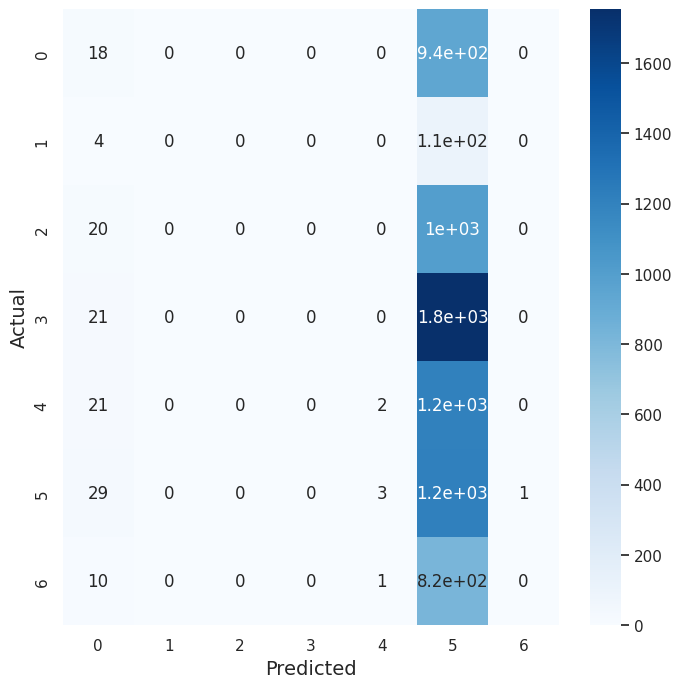

In [ ]:
from sklearn.metrics import confusion_matrix

# Get predictions for the test set
y_pred = CNN.predict(x_test)
# Convert the predictions from probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
# predict class probabilities for test set
y_pred = CNN.predict(x_test)
# get predicted class labels from predicted probabilities
y_pred_labels = np.argmax(y_pred, axis=1)
# get classification report
report = classification_report(y_test, y_pred_labels, target_names=code.keys())
print(report)

225/225 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

       angry       0.52      0.47      0.50       958
     disgust       0.75      0.51      0.61       111
        fear       0.46      0.42      0.44      1024
       happy       0.78      0.81      0.80      1774
     neutral       0.55      0.55      0.55      1233
         sad       0.45      0.51      0.48      1247
    surprise       0.78      0.76      0.77       831

    accuracy                           0.60      7178
   macro avg       0.61      0.58      0.59      7178
weighted avg       0.60      0.60      0.60      7178



Epoch 1/50
449/449 [==============================] - 15s 34ms/step - loss: 0.3986 - accuracy: 0.8721 - val_loss: 1.5094 - val_accuracy: 0.5974
Epoch 2/50
449/449 [==============================] - 15s 33ms/step - loss: 0.3982 - accuracy: 0.8709 - val_loss: 1.4923 - val_accuracy: 0.5988
Epoch 3/50
449/449 [==============================] - 15s 34ms/step - loss: 0.4110 - accuracy: 0.8675 - val_loss: 1.5078 - val_accuracy: 0.5989
Epoch 4/50
449/449 [==============================] - 15s 34ms/step - loss: 0.6160 - accuracy: 0.7970 - val_loss: 1.3041 - val_accuracy: 0.5855
Epoch 5/50
449/449 [==============================] - 15s 33ms/step - loss: 0.4705 - accuracy: 0.8502 - val_loss: 1.4648 - val_accuracy: 0.5991
Epoch 6/50
449/449 [==============================] - 15s 34ms/step - loss: 0.3988 - accuracy: 0.8727 - val_loss: 1.4809 - val_accuracy: 0.6009
Epoch 7/50
449/449 [==============================] - 15s 33ms/step - loss: 0.4277 - accuracy: 0.8646 - val_loss: 1.5989 - val_accuracy:

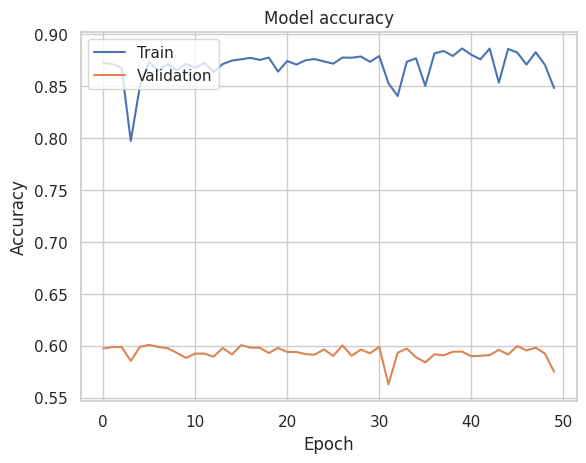

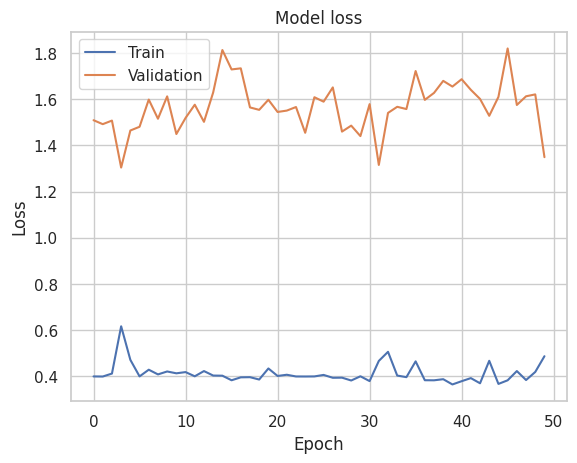

In [ ]:
# Plot training & validation accuracy values
history = CNN.fit(x_train,y_train, epochs=50, batch_size=64, verbose=1, validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: ignored